In [60]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')
%matplotlib inline

df = pd.read_csv('csvs/AAPL.csv')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [61]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.598297,234684800
1,2014-01-03,19.745001,19.775000,19.301071,19.320715,17.211735,392467600
2,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.305593,412610800
3,2014-01-07,19.440001,19.498571,19.211430,19.287144,17.181829,317209200
4,2014-01-08,19.243214,19.484285,19.238930,19.409286,17.290642,258529600


In [62]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,44.458833,44.929518,44.002989,44.486761,42.934757,1.612232e+08
std,24.773919,25.145097,24.378441,24.778533,25.330170,8.798263e+07
min,17.684999,17.911785,17.626785,17.849285,15.900919,4.544800e+07
25%,27.581249,27.935624,27.298126,27.593126,25.591819,1.024641e+08
50%,37.593750,38.012501,37.293751,37.638750,36.109432,1.371542e+08
75%,50.900624,51.406250,50.559375,50.995001,50.022025,1.958600e+08
max,138.050003,138.789993,134.339996,136.690002,136.486053,1.065523e+09


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1762 non-null   object 
 1   Open       1762 non-null   float64
 2   High       1762 non-null   float64
 3   Low        1762 non-null   float64
 4   Close      1762 non-null   float64
 5   Adj Close  1762 non-null   float64
 6   Volume     1762 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 96.5+ KB


# EDA

In [64]:
# Change the df to only take Adj Close and Date
df_a = df[['Date', 'Adj Close']].copy()

In [65]:
# Set the date to be datetime
df_a['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [66]:
# Set the date to be the index
df_a.set_index('Date', inplace=True)

In [67]:
df_a.head()

,Adj Close
Date,
2014-01-02,17.598297
2014-01-03,17.211735
2014-01-06,17.305593
2014-01-07,17.181829
2014-01-08,17.290642


In [68]:
df_a.columns

Index(['Adj Close'], dtype='object')

In [69]:
# Resample the data Monthly
monthly = df_a['Adj Close'].resample('M').mean()

In [70]:
monthly = monthly.to_frame()

In [71]:
monthly['Year'] = monthly.index.year
monthly['Month'] = monthly.index.strftime('%B')

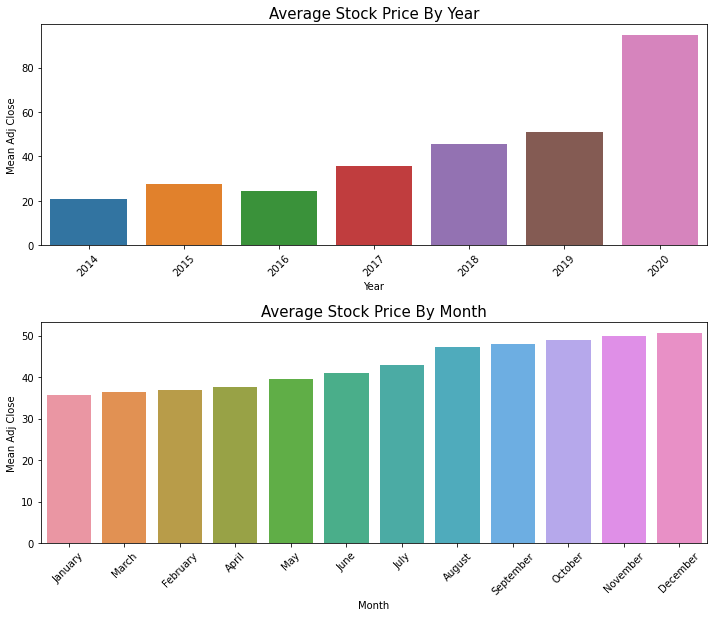

In [72]:
fig = plt.figure(figsize=(10,16))
fig.set_size_inches(10,16)
group_cols = monthly.columns

for enum,i in enumerate(group_cols[1:]):
    ax = fig.add_subplot(4,1,enum+1)
    Aggregated = pd.DataFrame(monthly.groupby(str(i))["Adj Close"].mean()).reset_index().sort_values('Adj Close')
    sns.barplot(data=Aggregated,x=str(i),y="Adj Close",ax=ax)
    ax.set(xlabel=str(i), ylabel='Mean Adj Close')
    ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
    plt.xticks(rotation=45)
plt.tight_layout(pad=1)

plt.savefig('images/bar_plot_stock.png')

In [73]:
monthly.head()

,Adj Close,Year,Month
Date,,,
2014-01-31,17.099288,2014,January
2014-02-28,16.838604,2014,February
2014-03-31,17.066210,2014,March
2014-04-30,17.317778,2014,April
2014-05-31,19.388588,2014,May


In [74]:
monthly.head()

,Adj Close,Year,Month
Date,,,
2014-01-31,17.099288,2014,January
2014-02-28,16.838604,2014,February
2014-03-31,17.066210,2014,March
2014-04-30,17.317778,2014,April
2014-05-31,19.388588,2014,May


Text(0.5, 1.0, 'Box Plots for Apple Stock')

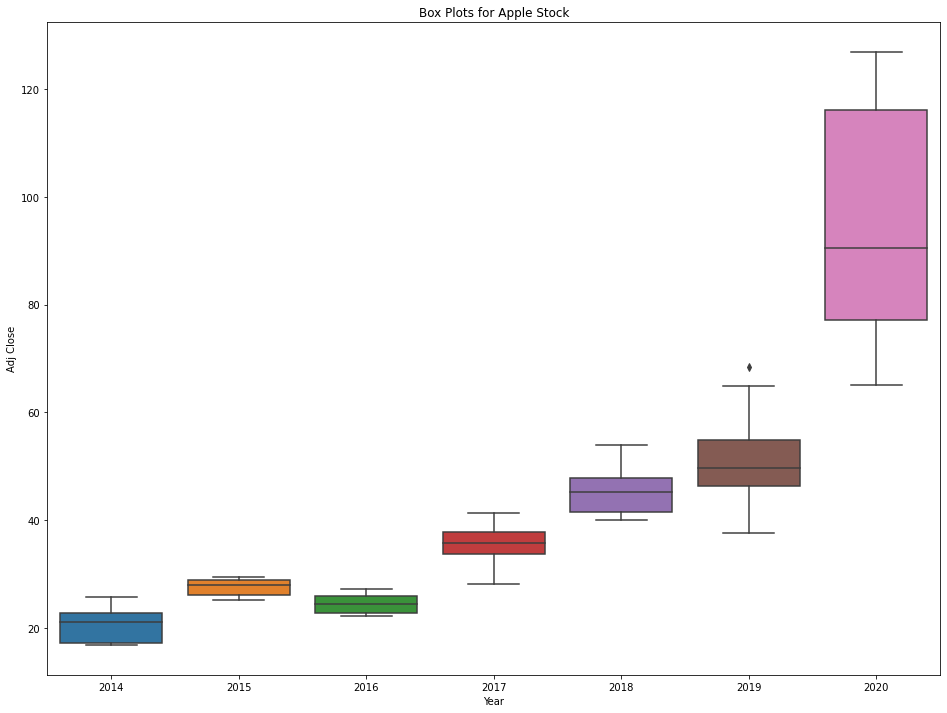

In [75]:
# Check box plots for how data outliers look

plt.figure(figsize=(16,12))
ax = sns.boxplot(x=monthly['Year'], y=monthly['Adj Close'])
plt.savefig('images/boxplot.png')
ax.set_title('Box Plots for Apple Stock')

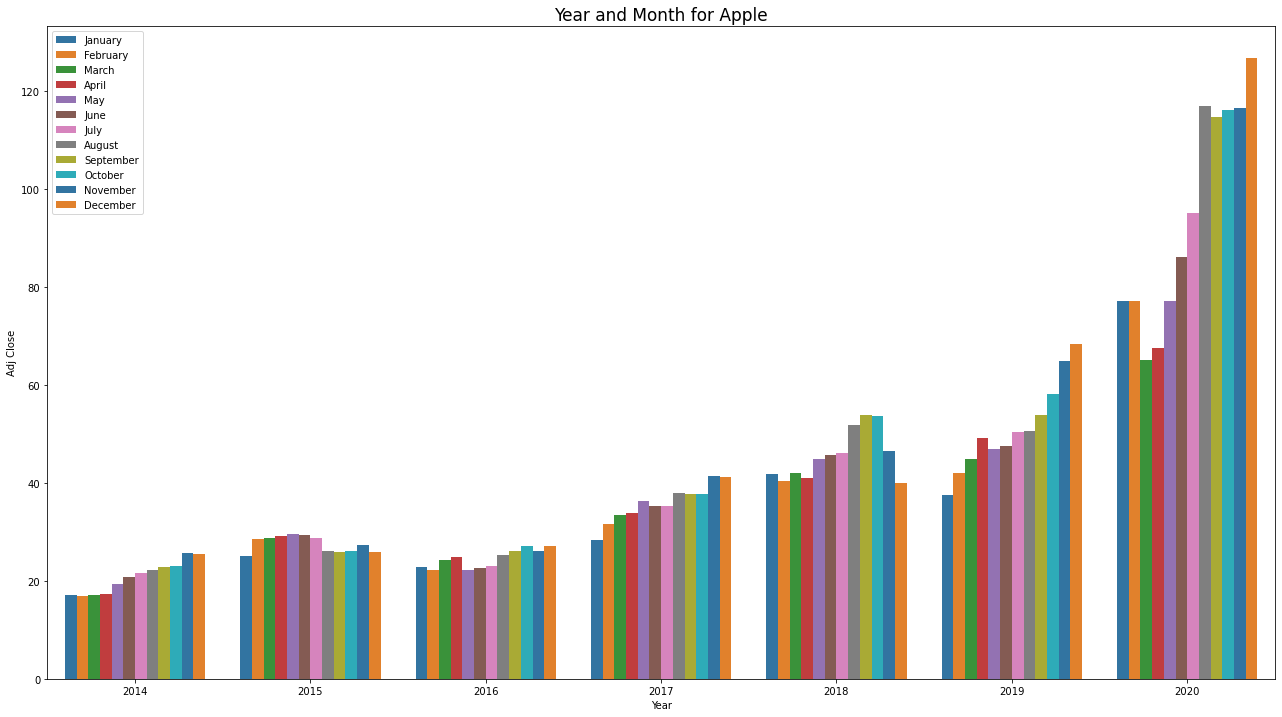

In [76]:
# See which months in which years are higher earners

fig, ax = plt.subplots(figsize=(22,12))
palette = sns.color_palette()
a = sns.barplot(x='Year', y='Adj Close', hue = 'Month', data=monthly, palette=palette)
a.set_title('Year and Month for Apple', fontsize=17)
plt.legend(loc='upper left')
plt.savefig('images/months_bar.png')
plt.show()



### No need to check for stationarity because it's a stock price

In [77]:
monthly.head()

,Adj Close,Year,Month
Date,,,
2014-01-31,17.099288,2014,January
2014-02-28,16.838604,2014,February
2014-03-31,17.066210,2014,March
2014-04-30,17.317778,2014,April
2014-05-31,19.388588,2014,May


In [78]:
y = monthly.drop(columns=['Year', 'Month'])

In [79]:
y.head()

,Adj Close
Date,
2014-01-31,17.099288
2014-02-28,16.838604
2014-03-31,17.066210
2014-04-30,17.317778
2014-05-31,19.388588


## But, we will anyways

In [80]:
# Use a function to check for the stationarity

def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(TS) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.savefig('images/stationarity.png')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

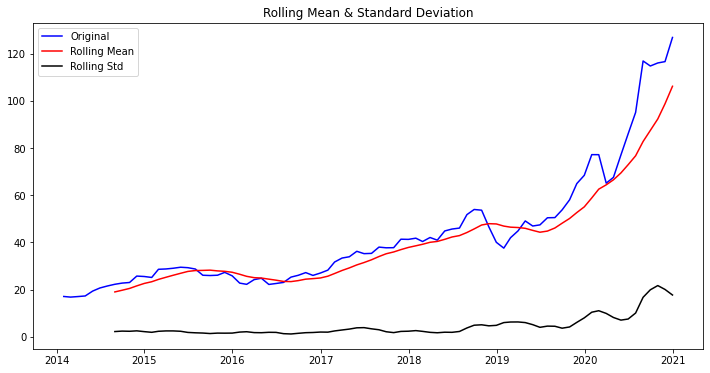

Results of Dickey-Fuller Test: 

Test Statistic                  2.581470
p-value                         0.999071
#Lags Used                     12.000000
Number of Observations Used    71.000000
Critical Value (1%)            -3.526005
Critical Value (5%)            -2.903200
Critical Value (10%)           -2.588995
dtype: float64


In [81]:
stationarity_check(y)

* With a p-value far exceeding the threshold of .05, we can see that this time-series is not stationary

### Take first-order diff of data

In [82]:
df_a_diff = y.diff()

# Drop first row to rid of null val in column
df_a_diff.dropna(inplace=True)

In [83]:
df_a_diff.head()

,Adj Close
Date,
2014-02-28,-0.260684
2014-03-31,0.227606
2014-04-30,0.251568
2014-05-31,2.070810
2014-06-30,1.312776


## Plot ACF and PACF

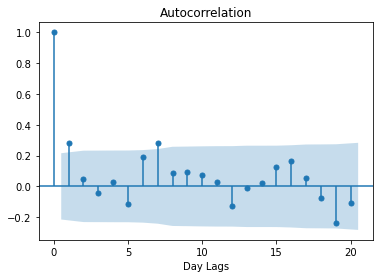

In [86]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_a_diff, lags=20)
plt.xlabel('Day Lags')
plt.savefig('images/acf.png')
plt.show()

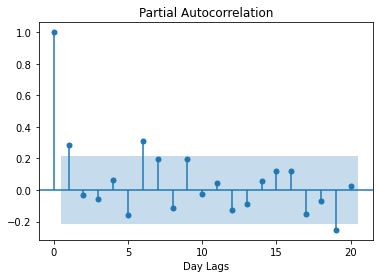

In [87]:
plot_pacf(df_a_diff)
plt.xlabel('Day Lags')
plt.savefig('images/pacf.png')
plt.show()

## Decompose the time series

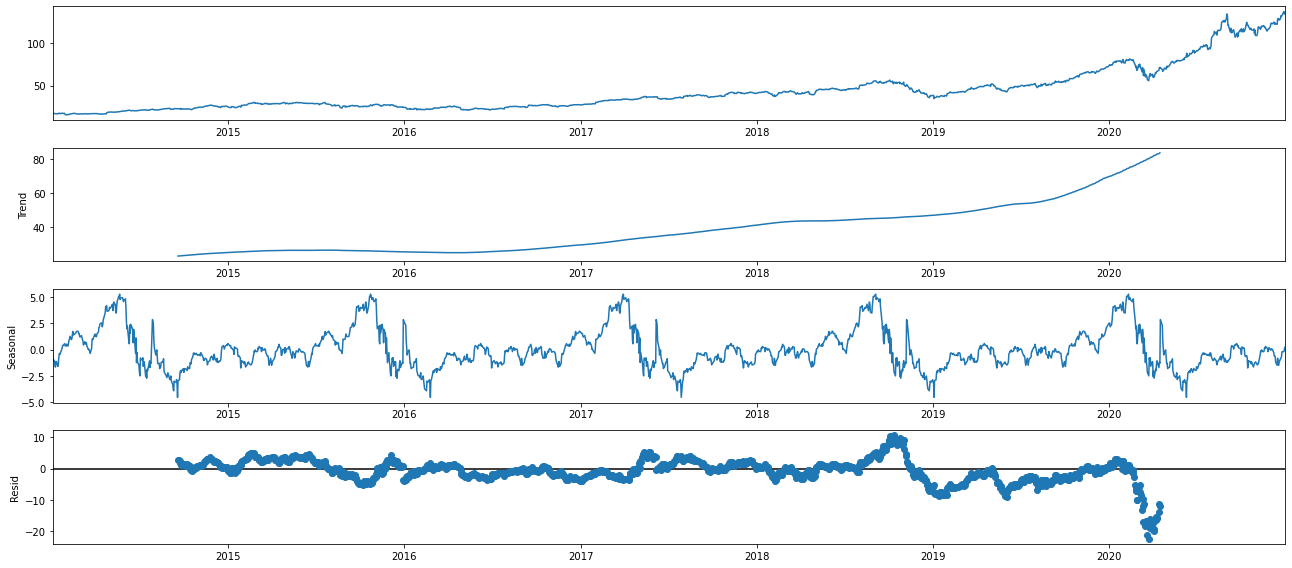

In [27]:
# Do a seasonal decomposition

from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_a, model='additive', period=360)
fig = decomposition.plot()
plt.savefig('images/decomposition.png')
plt.show()



* We see that the time series is unstable and seasonal with an upward trend

## Train, test split

In [28]:
y['2018'].head(100)

,Adj Close
Date,
2018-01-31,41.799486
2018-02-28,40.384751
2018-03-31,42.088325
2018-04-30,40.963878
2018-05-31,44.862368
2018-06-30,45.670755
2018-07-31,46.079952
2018-08-31,51.784979
2018-09-30,53.959101


In [29]:
test_y = y.loc['2018-09-30':'2020-01-31']
train_y = y.loc['2014-01-31':'2018-08-31']

## Run for loop to get best parameters for SARIMAX

In [30]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0,2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p,d,q))

# Generate all different combinations of seasonal p, q and q triplets (use 12 for frequency)
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

In [31]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_y,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =535.6316824810143
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =399.9566814569702
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =312.0931609606912
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =1297.2139090236444
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =298.18986505435055


/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =272.6694750253159
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =237.09100592644864
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =999.4170389012202


/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =459.70166692693607
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =340.666498533381
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =261.2261647860026


/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =1273.5466100436697
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =259.50594357685486
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =234.12691069253177
ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =205.9500955507248


/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =1224.0760897959804
ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =216.21714787693034
ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =173.67533016654485
ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =191.9722578626529
ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =1167.887217164092
ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =180.1773980789159
ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =175.52406041001834
ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =137.60910869892248
ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =1312.1163209483561
ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =214.63533467697948
ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =172.23762250702666
ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =189.44861131358664
ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =1232.841802592911
ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =181.82451383760304


/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =174.1607526218763
ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =139.46165707769023


/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =1230.6199644374428
ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =212.45612970547631
ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =175.52254824083073
ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =199.8498423728071
ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =1343.612358671211
ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =175.7185930296581
ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =177.53811620440487
ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =137.52409500151322


/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =1293.0552656422599
ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =211.4064921192
ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =171.78707528617085
ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =194.38475187894144


/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =1292.9553936613502
ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =177.55050866229703
ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =173.7860326100481
ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =137.4617881051222


/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =1244.0987170723956
ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =217.5252991843045
ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =175.2803009368341
ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =192.907222465136
ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =1316.4689183119792
ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =175.1709726509786
ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =177.13611748458948
ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =135.40570500747404
ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =1314.1163209483586
ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =212.0675827334172
ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =172.05348104651426
ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =191.19303721022933


/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =1201.3484909287652
ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =175.3800904574931
ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =173.89627464712555
ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =137.3860522420886
ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =1199.1431221842804


/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [32]:
# Find the parameters with minimal AIC value

ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 0)
pdqs    (1, 1, 0, 12)
aic           135.406
Name: 54, dtype: object

## Create ze model!!

In [33]:
mod = sm.tsa.statespace.SARIMAX(train_y,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0673      0.317     -0.212      0.832      -0.689       0.554
ar.S.L12      -0.5614      0.129     -4.366      0.000      -0.813      -0.309
sigma2         4.3737      1.455      3.005      0.003       1.521       7.226


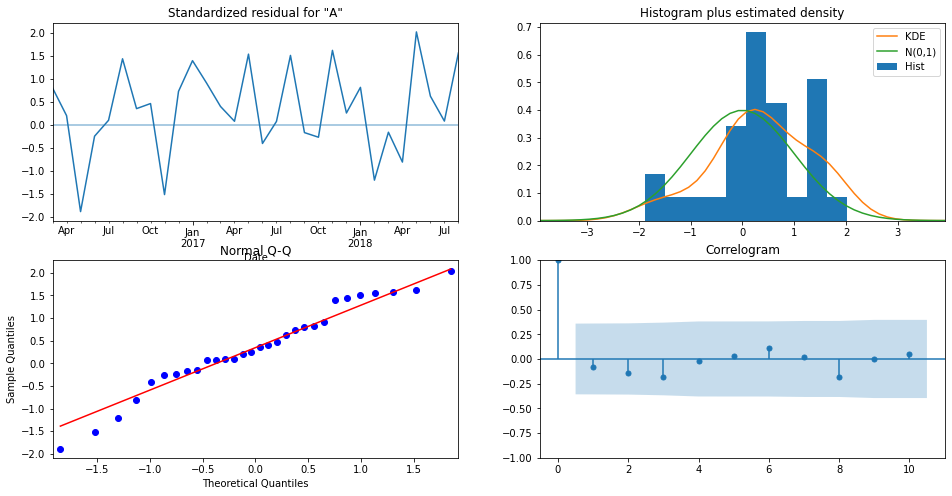

In [34]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error

y_pred = results.forecast(steps=56)
print(np.sqrt(mean_squared_error(train_y, y_pred)))

52.628297575402335


## Validate our forecasts

In [36]:
# Calc Result Metrics
def result_metrics(test_series,forecast_series,model_name):
    print('Result Metrics for {}'.format(model_name))
    print('R2 Score : ',round(r2_score(test_series,forecast_series),3))
    print('Mean Squared Error : ',round(mean_squared_error(test_series,forecast_series),3))
    print('Mean Absolute Error : ',round(mean_absolute_error(test_series,forecast_series),3))
    print('Mean Absolute Percentage Error',round(mean_absolute_percentage_error(test_series,forecast_series),3))
    accuracy = 100-mean_absolute_percentage_error(test_series,forecast_series)
    print('Accuracy(100-MAPE) of Model is {}%'.format(round(accuracy),3))
    print('Root Mean Squared Error : ', round(np.sqrt(mean_squared_error(test_series,forecast_series)),3))

In [37]:
# Loss Function Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Adj Close   No. Observations:                   56
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                 -64.703
Date:                            Thu, 01 Apr 2021   AIC                            135.406
Time:                                    13:29:25   BIC                            139.609
Sample:                                01-31-2014   HQIC                           136.750
                                     - 08-31-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0673      0.317     -0.212      0.832      -0.689       0.554
ar.S.L12      -0.5614      0.129     -4.366      0.000      -0.813      -0.309
sigma2         4.3737      1.455      3.005      0.003       1.521       7.226
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                 0.73
Prob(Q):                              0.63   Prob(JB):                         0.69
Heteroskedasticity (H):               1.30   Skew:                            -0.37
Prob(H) (two-sided):                  0.69   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

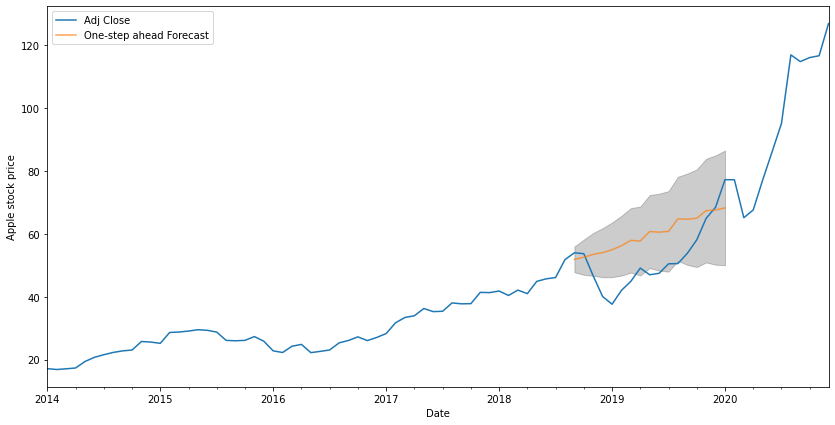

In [39]:
pred = results.get_prediction(start='2018-09-30', end='2020-01-31', dynamic=False)
pred_ci = pred.conf_int()
ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Apple stock price')
plt.legend()
plt.savefig('images/sarima1.png')
plt.show()


In [40]:
y['2020'].head()

,Adj Close
Date,
2020-01-31,77.196028
2020-02-29,77.179672
2020-03-31,65.106348
2020-04-30,67.572752
2020-05-31,77.058615


In [41]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-09-30':'2020-01-31']
mse = ((np.array(y_forecasted) - np.array(y_truth)) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))


The Mean Squared Error of our forecasts is 190.56


In [42]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 13.8


## Visualize the forecasts

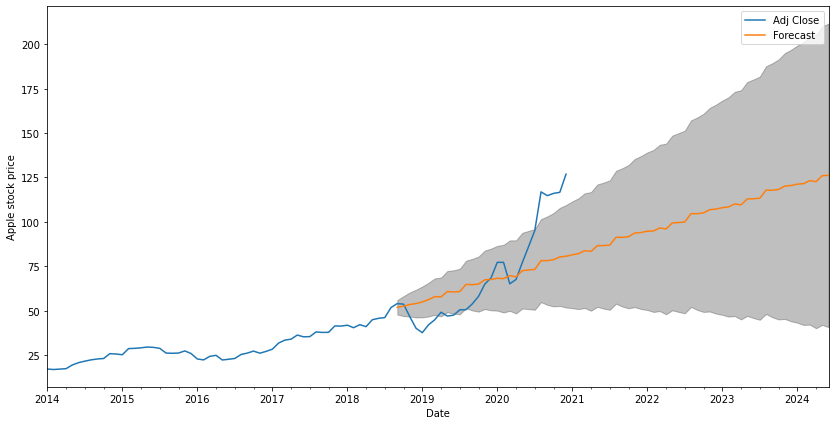

In [43]:
pred_uc = results.get_forecast(steps=70)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Apple stock price')
plt.legend()
plt.savefig('images/sarima_kamehameha.png')
plt.show()

# Third Attempt at Modeling (NO 2020)

In [44]:
test_y = y.loc['2017-12-31':'2020-01-31']
train_y = y.loc['2014-01-31':'2017-11-30']

In [45]:
model = sm.tsa.SARIMAX(train_y,order=(1,1,0),seasonal_order=(1,1,0,12))
results=model.fit()
forecasts_train = results.predict(start='2014-01-31',end='2017-11-30')
forecasts_test = results.predict(start='2017-12-31',end='2020-01-31')


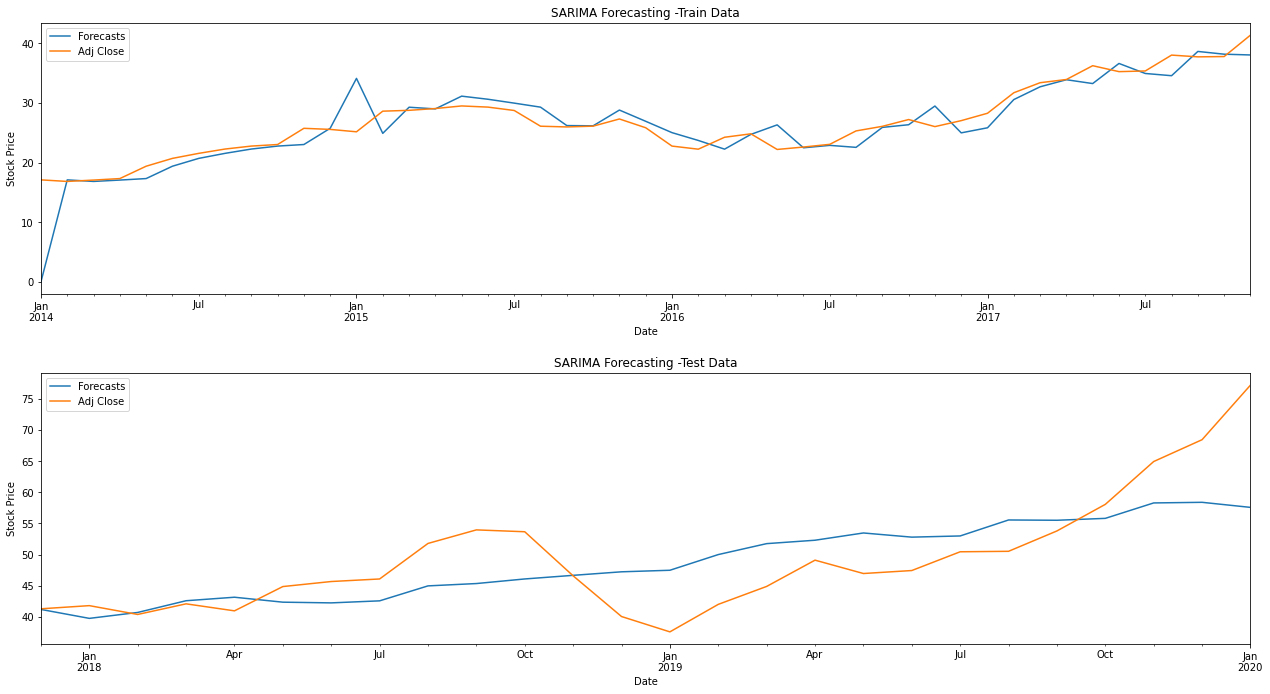

In [46]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
train_y.plot(label='Actual',ax=ax1)
ax1.set_ylabel('Stock Price')

forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
test_y.plot(label='Actual',ax=ax2)
ax2.set_ylabel('Stock Price')

ax1.legend()
ax2.legend()
plt.tight_layout(pad=2)
plt.savefig('images/sarima_no_2020.png')

In [47]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

print(result_metrics(train_y,forecasts_train,'SARIMA-Train Data'))
print('----')
print(result_metrics(test_y,forecasts_test,'SARIMA-Test Data'))

Result Metrics for SARIMA-Train Data
R2 Score :  0.681
Mean Squared Error :  10.997
Mean Absolute Error :  1.844
Mean Absolute Percentage Error 27.109
Accuracy(100-MAPE) of Model is 73.0%
Root Mean Squared Error :  3.316
None
----
Result Metrics for SARIMA-Test Data
R2 Score :  0.489
Mean Squared Error :  43.442
Mean Absolute Error :  5.098
Mean Absolute Percentage Error 16.556
Accuracy(100-MAPE) of Model is 83.0%
Root Mean Squared Error :  6.591
None


* We have pretty good accuracy in both the train and test set for the models

In [48]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Adj Close   No. Observations:                   47
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                 -71.800
Date:                            Thu, 01 Apr 2021   AIC                            149.599
Time:                                    13:29:26   BIC                            154.178
Sample:                                01-31-2014   HQIC                           151.161
                                     - 11-30-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1163      0.260      0.447      0.655      -0.393       0.626
ar.S.L12      -0.6300      0.120     -5.233      0.000      -0.866      -0.394
sigma2         3.3427      0.879      3.803      0.000       1.620       5.065
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.11
Prob(Q):                              0.91   Prob(JB):                         0.95
Heteroskedasticity (H):               2.11   Skew:                             0.00
Prob(H) (two-sided):                  0.23   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
y['2020']

,Adj Close
Date,
2020-01-31,77.196028
2020-02-29,77.179672
2020-03-31,65.106348
2020-04-30,67.572752
2020-05-31,77.058615
2020-06-30,86.018833
2020-07-31,95.087866
2020-08-31,116.885213
2020-09-30,114.755479


# SARIMA with 2020

In [50]:
test_y = y.loc['2018-12-31':'2020-12-31']
train_y = y.loc['2014-01-31':'2018-11-30']

In [51]:
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_y,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =569.8225243435779
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =429.2763584818086
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =337.4220470452316
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =1428.1117225062592
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =318.13170242429
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =294.42938428964493


/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =260.9850764556139
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =1462.4741704585829
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =489.3033002956668
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =365.5345064960897
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =282.4157806548968
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =2213.230022195513
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =278.1442351393844
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =253.01640673602088
ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =228.1897067525253


/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =2094.507641802271
ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =241.2275177615451
ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =196.86640211613351
ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =221.5602313691124
ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =1170.077386387679
ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =202.7780650097765
ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =198.7483765694887
ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =159.5262404494036


/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =1470.7728170227415
ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =238.56440462718743
ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =194.22423871195798
ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =218.39251754928085


/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =916.4406676714794
ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =203.61805742031748
ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =196.43151884704824
ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =161.50469969412077


/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =1154.26388905299
ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =243.3015821003255
ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =201.49468131425078
ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =227.9449150192418


/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =1365.3059440292059
ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =201.05425271250635
ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =202.9803720753867
ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =161.45144618214755


/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =1237.2857863082138
ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =241.78314117446615
ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =197.64365126328244
ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =221.93118579828663
ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =1402.9689604766752
ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =203.00519764594605
ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =199.32340047641927
ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =163.4510480652146
ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =1278.7584384014713
ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =241.79393219473957
ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =197.6953240676522
ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =222.40300942490947
ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =1172.0773863876793
ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =197.68972162786065
ARIMA (1

/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =1417.2722895490429
ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =240.55492347176983
ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =196.0881452127771
ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =220.37702487117545


/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =1016.1138099792793
ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =199.60256755001495
ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =199.10325746487766
ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =159.66400902149263
ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =1253.9387012679658


/Users/riptonrosen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [55]:
# Find the parameters with minimal AIC value

ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 0)
pdqs    (1, 1, 0, 12)
aic           157.726
Name: 54, dtype: object

In [52]:
model = sm.tsa.SARIMAX(train_y,order=(1,1,0),seasonal_order=(1,1,0,12))
results=model.fit()
forecasts_train = results.predict(start='2014-01-31',end='2018-11-30')
forecasts_test = results.predict(start='2018-12-31',end='2020-12-31')


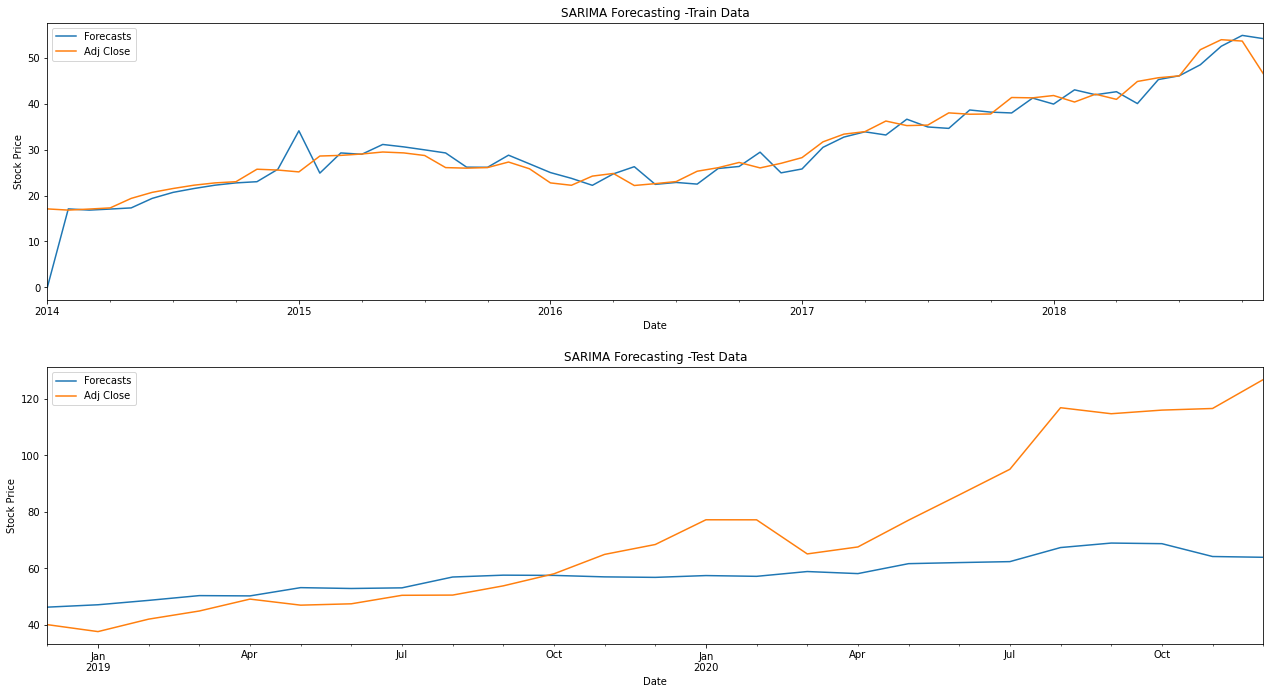

In [53]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(18,10))

forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
train_y.plot(label='Actual',ax=ax1)
ax1.set_ylabel('Stock Price')

forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
test_y.plot(label='Actual',ax=ax2)
ax2.set_ylabel('Stock Price')

ax1.legend()
ax2.legend()
plt.tight_layout(pad=2)
plt.savefig('images/sarima_2020.png')

In [54]:
print(result_metrics(train_y,forecasts_train,'SARIMA-Train Data'))
print('----')
print(result_metrics(test_y,forecasts_test,'SARIMA-Test Data'))

Result Metrics for SARIMA-Train Data
R2 Score :  0.882
Mean Squared Error :  10.616
Mean Absolute Error :  1.898
Mean Absolute Percentage Error 37.255
Accuracy(100-MAPE) of Model is 63.0%
Root Mean Squared Error :  3.258
None
----
Result Metrics for SARIMA-Test Data
R2 Score :  0.103
Mean Squared Error :  673.348
Mean Absolute Error :  18.365
Mean Absolute Percentage Error 29.473
Accuracy(100-MAPE) of Model is 71.0%
Root Mean Squared Error :  25.949
None


## For dynamic forecasting

In [49]:
# # Get dynamic predictions with confidence intervals as above 
# pred_dynamic = output.get_prediction(start=pd.to_datetime('2019-01-02'),\
#                                     dynamic=True, full_results=True)
# pred_dynamic_conf = pred_dynamic.conf_int()


In [50]:
# ax = df_a['2014':].plot(label='observed', figsize=(20, 15))
# pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

# ax.fill_between(pred_dynamic_conf.index,
#                 pred_dynamic_conf.iloc[:, 0],
#                 pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

# ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2019-01-02'), apple_forecasted.index[-1],\
#                  alpha=.1, zorder=-1)

# ax.set_xlabel('Date')
# ax.set_ylabel('Apple Stock')

# plt.legend()
# plt.show()

In [51]:
# # Extract the predicted and true values of our time series
# apple_forecasted = pred_dynamic.predicted_mean
# apple_truth = df_a['2019-01-02':]

# # Compute the mean square error
# mse = ((apple_forecasted - apple_truth) ** 2).mean()
# print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [52]:
# # Get forecast 500 steps ahead in future
# prediction = output.get_forecast(steps=500)

# # Get confidence intervals of forecasts
# pred_conf = prediction.conf_int()

In [53]:
# # Plot future predictions with confidence intervals
# ax = df_a.plot(label='observed', figsize=(20, 15))
# prediction.predicted_mean.plot(ax=ax, label='Forecast')
# ax.fill_between(pred_conf.index,
#                 pred_conf.iloc[:, 0],
#                 pred_conf.iloc[:, 1], color='k', alpha=0.25)
# ax.set_xlabel('Date')
# ax.set_ylabel('Apple Stock')

# plt.legend()
# plt.show()

# Facebook Prophet

In [54]:
for_proph = monthly.copy()
for_proph['Date'] = for_proph.index
for_proph.head()

,Adj Close,Year,Month,Date
Date,,,,
2014-01-31,17.099288,2014,January,2014-01-31
2014-02-28,16.838604,2014,February,2014-02-28
2014-03-31,17.066210,2014,March,2014-03-31
2014-04-30,17.317778,2014,April,2014-04-30
2014-05-31,19.388588,2014,May,2014-05-31


In [55]:
for_proph.drop(columns = ['Year', 'Month'], inplace=True)

In [56]:
for_proph = for_proph.reindex(columns=['Date', 'Adj Close'])

In [57]:
# Create the DF for prophet and rename the columns for it as ds and y

for_proph.rename(columns = {'Date': 'ds', 'Adj Close': 'y'}, inplace=True)

In [58]:
for_proph.head()

,ds,y
Date,,
2014-01-31,2014-01-31,17.099288
2014-02-28,2014-02-28,16.838604
2014-03-31,2014-03-31,17.066210
2014-04-30,2014-04-30,17.317778
2014-05-31,2014-05-31,19.388588


In [59]:
from sklearn.model_selection import train_test_split

proph_train, proph_test = train_test_split(for_proph, train_size=.65, shuffle=False)

print('Train size: ', len(proph_train))
print('Test size: ', len(proph_test))

Train size:  54
Test size:  30


In [60]:
from fbprophet import Prophet

model = Prophet(daily_seasonality = True)
model.fit(proph_train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [61]:
# Predict

future_preds = model.make_future_dataframe(periods=30, freq='M')

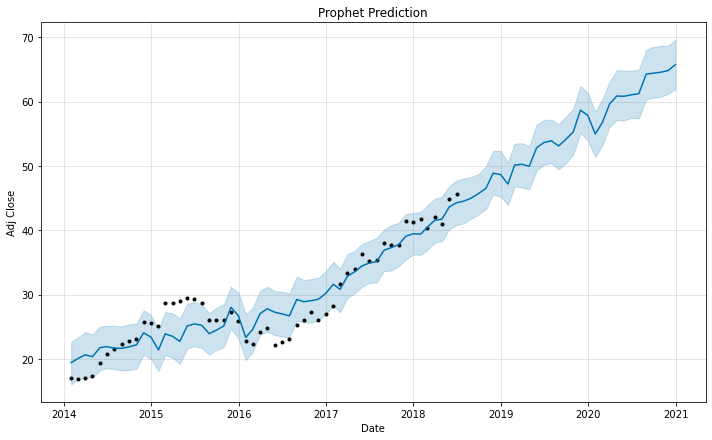

In [62]:
# Plot predictions

preds = model.predict(future_preds)
preds.index = for_proph['y'].index
model.plot(preds)

plt.title('Prophet Prediction')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.show()

In [63]:
df_proph = pd.concat([preds['yhat'],for_proph['y']],axis=1,ignore_index=True)
df_proph.columns = ['Predicted','Actual']
df_proph.head()

,Predicted,Actual
Date,,
2014-01-31,19.414965,17.099288
2014-02-28,20.044754,16.838604
2014-03-31,20.632202,17.066210
2014-04-30,20.330741,17.317778
2014-05-31,21.742330,19.388588


## Prophet components plotting

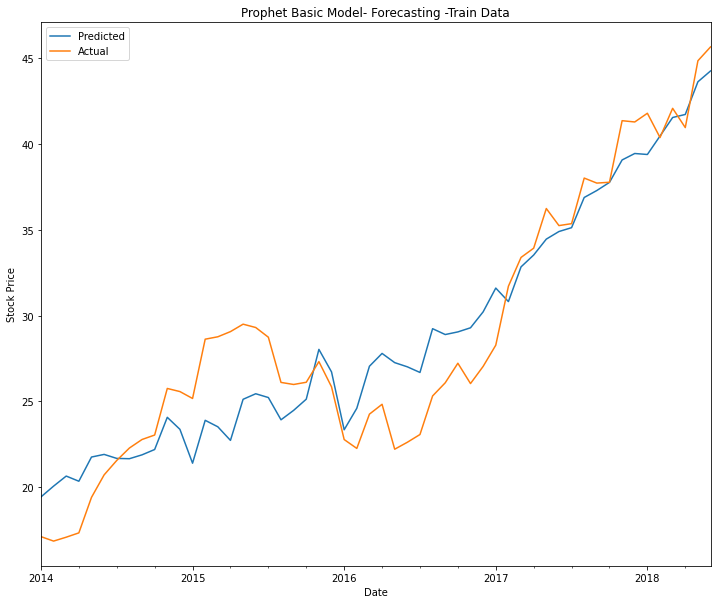

In [80]:
fig = plt.figure(figsize=(12,10))
df_proph['Predicted'][:54].plot(label='Predicted')
df_proph['Actual'][:54].plot(label='Actual')
plt.title('Prophet Basic Model- Forecasting -Train Data')
plt.ylabel('Stock Price')
plt.legend()

plt.savefig('proph_train.png')

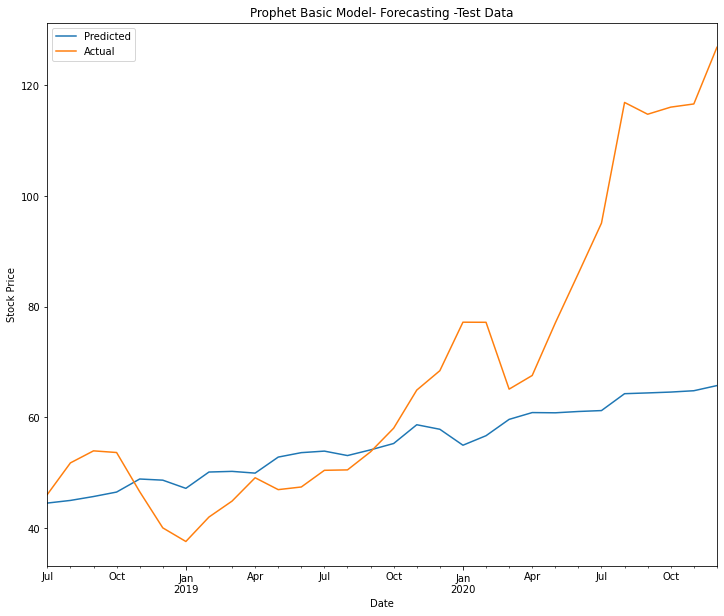

In [81]:
fig = plt.figure(figsize=(12,10))
df_proph['Predicted'][54:].plot(label='Predicted')
df_proph['Actual'][54:].plot(label='Actual')
plt.title('Prophet Basic Model- Forecasting -Test Data')
plt.ylabel('Stock Price')
plt.legend()

plt.savefig('proph_test.png')

In [108]:
result_metrics(df_proph['Actual'][54:],df_proph['Predicted'][54:],'Hyper-Tuned Prophet Test Data')

Result Metrics for Hyper-Tuned Prophet Test Data
R2 Score :  0.127
Mean Squared Error :  602.299
Mean Absolute Error :  16.461
Mean Absolute Percentage Error 19.441
Accuracy(100-MAPE) of Model is 81.0%
Root Mean Squared Error :  24.542


In [107]:
result_metrics(df_proph['Actual'][:54],df_proph['Predicted'][:54],'Hyper-Tuned Prophet Train Data')

Result Metrics for Hyper-Tuned Prophet Train Data
R2 Score :  0.879
Mean Squared Error :  7.002
Mean Absolute Error :  2.159
Mean Absolute Percentage Error 8.436
Accuracy(100-MAPE) of Model is 92.0%
Root Mean Squared Error :  2.646


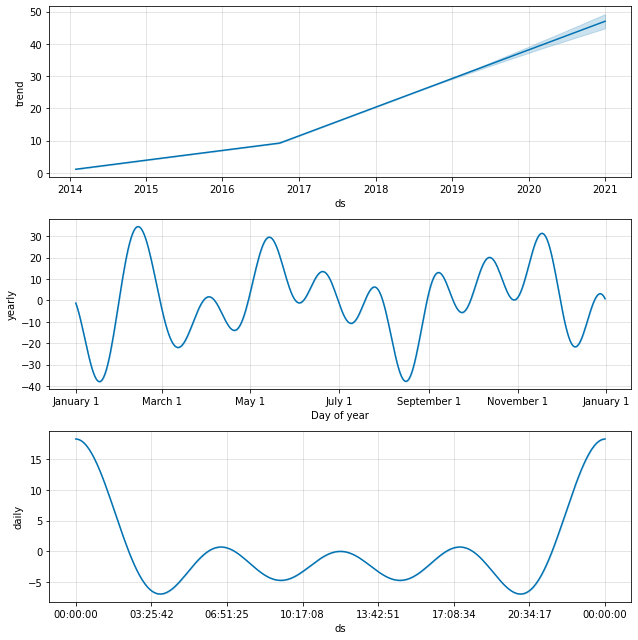

In [82]:
model.plot_components(preds)
plt.show()

In [85]:
preds

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
Date,,,,,,,,,,,,,,,,,,,
2014-01-31,2014-01-31,1.143142,16.004329,22.667341,1.143142,1.143142,18.271822,18.271822,18.271822,18.275093,18.275093,18.275093,-0.003270,-0.003270,-0.003270,0.0,0.0,0.0,19.414965
2014-02-28,2014-02-28,1.377471,16.839256,23.273505,1.377471,1.377471,18.667283,18.667283,18.667283,18.275093,18.275093,18.275093,0.392191,0.392191,0.392191,0.0,0.0,0.0,20.044754
2014-03-31,2014-03-31,1.636905,17.071811,24.177544,1.636905,1.636905,18.995297,18.995297,18.995297,18.275093,18.275093,18.275093,0.720204,0.720204,0.720204,0.0,0.0,0.0,20.632202
2014-04-30,2014-04-30,1.887971,17.100561,23.773390,1.887971,1.887971,18.442770,18.442770,18.442770,18.275093,18.275093,18.275093,0.167677,0.167677,0.167677,0.0,0.0,0.0,20.330741
2014-05-31,2014-05-31,2.147406,18.183163,25.018554,2.147406,2.147406,19.594925,19.594925,19.594925,18.275093,18.275093,18.275093,1.319832,1.319832,1.319832,0.0,0.0,0.0,21.742330
2014-06-30,2014-06-30,2.398471,18.570823,25.194150,2.398471,2.398471,19.497538,19.497538,19.497538,18.275093,18.275093,18.275093,1.222445,1.222445,1.222445,0.0,0.0,0.0,21.896010
2014-07-31,2014-07-31,2.657906,18.383382,25.158125,2.657906,2.657906,19.004484,19.004484,19.004484,18.275093,18.275093,18.275093,0.729392,0.729392,0.729392,0.0,0.0,0.0,21.662391
2014-08-31,2014-08-31,2.917341,18.185326,25.031175,2.917341,2.917341,18.727714,18.727714,18.727714,18.275093,18.275093,18.275093,0.452621,0.452621,0.452621,0.0,0.0,0.0,21.645055
2014-09-30,2014-09-30,3.168407,18.251118,25.399652,3.168407,3.168407,18.702163,18.702163,18.702163,18.275093,18.275093,18.275093,0.427071,0.427071,0.427071,0.0,0.0,0.0,21.870570


# Hyperparameter tuned Facebook Prophet model

In [86]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.3,0.4],
              'holidays_prior_scale':[0.3,0.4],
              'n_changepoints' : [20,50]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 16


In [87]:
hyper_proph = monthly.copy()
hyper_proph['Date'] = hyper_proph.index
hyper_proph.head()

hyper_proph.drop(columns = ['Year', 'Month'], inplace=True)

hyper_proph = hyper_proph.reindex(columns=['Date', 'Adj Close'])

hyper_proph.rename(columns = {'Date': 'ds', 'Adj Close': 'y'}, inplace=True)

In [88]:
prophet_train_hyper, prophet_test_hyper = train_test_split(hyper_proph,train_size=0.65, shuffle=False)


In [89]:
prophet_test_hyper

,ds,y
Date,,
2018-07-31,2018-07-31,46.079952
2018-08-31,2018-08-31,51.784979
2018-09-30,2018-09-30,53.959101
2018-10-31,2018-10-31,53.660716
2018-11-30,2018-11-30,46.586082
2018-12-31,2018-12-31,40.052425
2019-01-31,2019-01-31,37.589749
2019-02-28,2019-02-28,42.004158
2019-03-31,2019-03-31,44.883499


In [90]:
strt='2018-07-31'
end='2020-12-31'
model_parameters = pd.DataFrame(columns = ['MAPE','Parameters'])
for i in grid:
    test = pd.DataFrame()
    print(i)
    
    train_model =Prophet(changepoint_prior_scale = i['changepoint_prior_scale'],
                         holidays_prior_scale = i['holidays_prior_scale'],
                         n_changepoints = i['n_changepoints'],
                         seasonality_mode = i['seasonality_mode'],
                         weekly_seasonality=False,
                         daily_seasonality = False,
                         yearly_seasonality = True,
                         )
    
    train_model.fit(prophet_train_hyper)
    train_forecast = train_model.make_future_dataframe(periods=30, freq='M',include_history = False)
    train_forecast = train_model.predict(train_forecast)
    test=train_forecast[['ds','yhat']]
    Actual = hyper_proph[(hyper_proph['ds']>=strt) & (hyper_proph['ds']<=end)]
    MAPE = mean_absolute_percentage_error(Actual['y'],abs(test['yhat']))
    print('Mean Absolute Percentage Error(MAPE)---------------------------------------------------------',MAPE)
    model_parameters = model_parameters.append({'MAPE':MAPE,'Parameters':p},ignore_index=True)

{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 19.569104481734957
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 20, 'seasonality_mode': 'additive'}


INFO:fbprophet:n_changepoints greater than number of observations. Using 42.


Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 19.394647515950894
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:n_changepoints greater than number of observations. Using 42.


Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 19.646583126187448
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 19.42634527997506
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 19.569104481734957
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 20, 'seasonality_mode': 'additive'}


INFO:fbprophet:n_changepoints greater than number of observations. Using 42.


Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 19.394647515950894
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:n_changepoints greater than number of observations. Using 42.


Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 19.646583126187448
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 50, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 19.42634527997506
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 19.533596577761553
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 20, 'seasonality_mode': 'additive'}


INFO:fbprophet:n_changepoints greater than number of observations. Using 42.


Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 19.35642405970708
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:n_changepoints greater than number of observations. Using 42.


Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 19.618896007134563
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 50, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 19.38790020633037
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 20, 'seasonality_mode': 'multiplicative'}
Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 19.533596577761553
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 20, 'seasonality_mode': 'additive'}


INFO:fbprophet:n_changepoints greater than number of observations. Using 42.


Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 19.35642405970708
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 50, 'seasonality_mode': 'multiplicative'}


INFO:fbprophet:n_changepoints greater than number of observations. Using 42.


Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 19.618896007134563
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 50, 'seasonality_mode': 'additive'}
Mean Absolute Percentage Error(MAPE)--------------------------------------------------------- 19.38790020633037


In [91]:
parameters = model_parameters.sort_values(by=['MAPE'])
parameters = parameters.reset_index(drop=True)
parameters['Parameters'][0]

{'changepoint_prior_scale': 0.4,
 'holidays_prior_scale': 0.4,
 'n_changepoints': 50,
 'seasonality_mode': 'additive'}

In [92]:
tuned_prophet = Prophet(
                      growth='linear',
                      changepoint_prior_scale= 0.4,
                      holidays_prior_scale = 0.4,
                      seasonality_prior_scale=0.3,
                      
                      seasonality_mode = 'additive',
                      weekly_seasonality=False,
                      daily_seasonality = False,
                      yearly_seasonality = True,
                      changepoints=['2018-06-30']
                      )
tuned_prophet.add_country_holidays(country_name='US')
tuned_prophet.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)
tuned_prophet.add_seasonality(name='yearly', period=365, fourier_order=20)
tuned_prophet.add_country_holidays(country_name='US')
tuned_prophet.fit(prophet_train_hyper)

In [97]:
hyper_fut = tuned_prophet.make_future_dataframe(periods=30,freq='M')
hyper_fut = tuned_prophet.predict(hyper_fut)
hyper_fut.index = hyper_proph['y'].index
tuned_prophet = pd.concat([hyper_fut['yhat'],hyper_proph['y']],axis=1,ignore_index=True)
tuned_prophet.columns = ['Predicted','Actual']
tuned_prophet.tail(3)





,Predicted,Actual
Date,,
2020-10-31,52.235500,116.039288
2020-11-30,52.169932,116.612717
2020-12-31,53.603005,126.843789


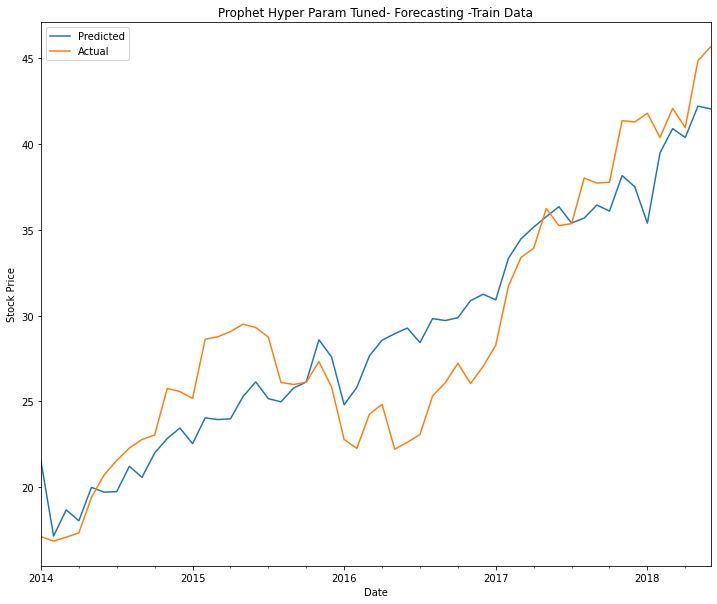

In [99]:
fig = plt.figure(figsize=(12,10))
tuned_prophet['Predicted'][:54].plot(label='Predicted')
tuned_prophet['Actual'][:54].plot(label='Actual')
plt.title('Prophet Hyper Param Tuned- Forecasting -Train Data')
plt.ylabel('Stock Price')
plt.legend()

plt.savefig('hyper_train.png')

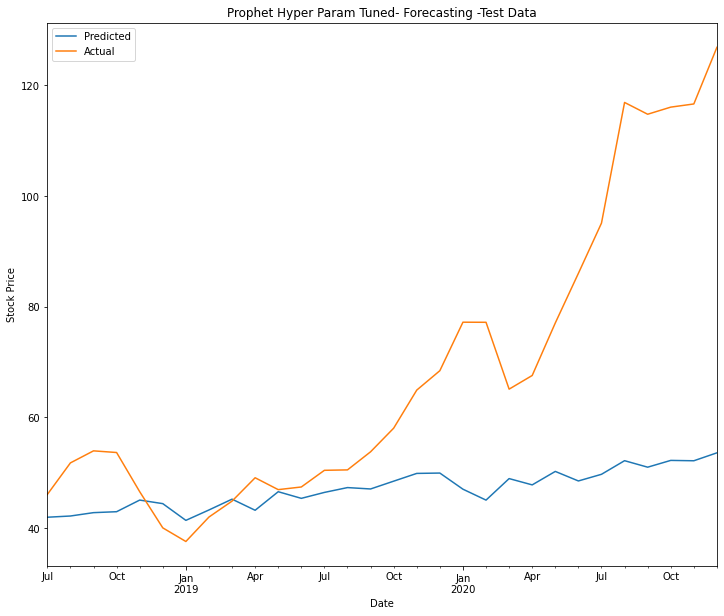

In [100]:
fig = plt.figure(figsize=(12,10))
tuned_prophet['Predicted'][54:].plot(label='Predicted')
tuned_prophet['Actual'][54:].plot(label='Actual')
plt.title('Prophet Hyper Param Tuned- Forecasting -Test Data')
plt.ylabel('Stock Price')
plt.legend()

plt.savefig('hyper_test.png')

In [105]:
result_metrics(tuned_prophet['Actual'][:54],tuned_prophet['Predicted'][:54],'Hyper-Tuned Prophet Train Data')

Result Metrics for Hyper-Tuned Prophet Train Data
R2 Score :  0.832
Mean Squared Error :  9.737
Mean Absolute Error :  2.582
Mean Absolute Percentage Error 9.557
Accuracy(100-MAPE) of Model is 90.0%
Root Mean Squared Error :  3.12


In [106]:
result_metrics(tuned_prophet['Actual'][54:],tuned_prophet['Predicted'][54:],'Hyper-Tuned Prophet Test Data')

Result Metrics for Hyper-Tuned Prophet Test Data
R2 Score :  -0.438
Mean Squared Error :  992.287
Mean Absolute Error :  21.667
Mean Absolute Percentage Error 24.881
Accuracy(100-MAPE) of Model is 75.0%
Root Mean Squared Error :  31.501
